### Phase 4: Feature Analysis - Housing Market Pricing
In this phase, we aim to identify and evaluate the most influential features that effect housing prices.
This include correlation analysis, categorical comparisons, and feature importance estimation using machine learning models.

**Objectives**
- To determine which numerical and categorical features strongly influence house prices.
- To visualize relationships and identify key drivers of property values.
- To prepare for predictive modeling in the next phase.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv('clean_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
target = 'SalePrice'
features = [col for col in df.columns if col != target]

print(f"Target variable: {target}")
print(f"Number of features: {len(features)}")
print(df.dtypes)

Target variable: SalePrice
Number of features: 76
Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 77, dtype: object


Top 10 Numerical Features Correlated w Price
SalePrice      1.00
OverallQual    0.80
GrLivArea      0.72
GarageCars     0.65
TotalBsmtSF    0.65
GarageArea     0.64
1stFlrSF       0.63
FullBath       0.56
TotRmsAbvGrd   0.54
YearBuilt      0.54
Name: SalePrice, dtype: float64


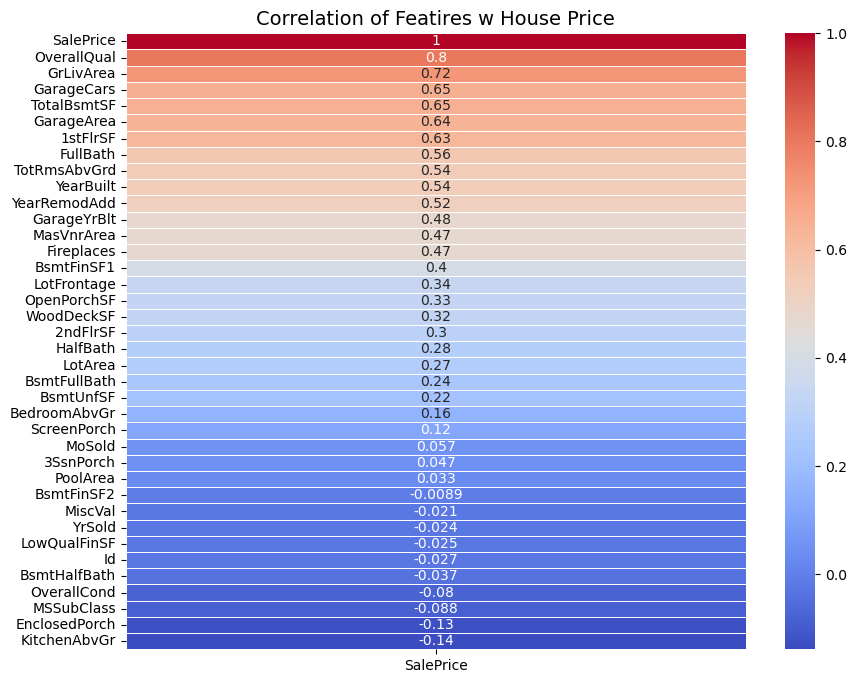

In [10]:
corr_matrix = df.corr(numeric_only = True)
price_corr = corr_matrix[target].sort_values(ascending = False)
print("Top 10 Numerical Features Correlated w Price")
print(price_corr.head(10))

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix[[target]].sort_values(by = target, ascending = False), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title("Correlation of Featires w House Price", fontsize = 14)
plt.show()

**Interpretation**
- Features w corr > 0.6 have strong positive relationships w price.
- Features w corr < -0.3 have stong negative relationships.
- e.g, 'OverallQual' and 'GrLiveArea' often show strong positive corr w housing prices.

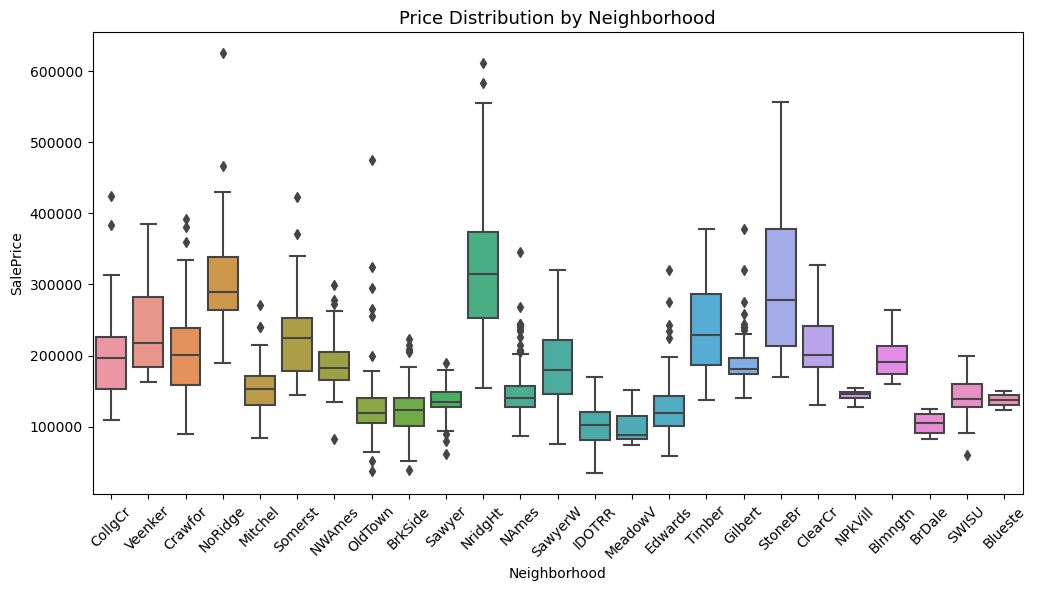

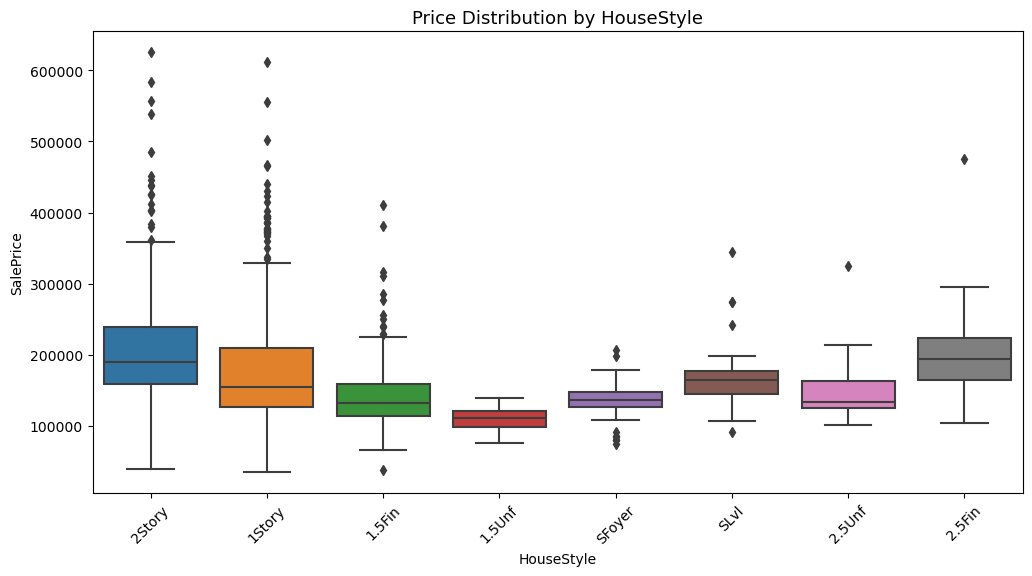

In [12]:
categorical_features = ['Neighborhood', 'HouseStyle', 'ExteriorType']

for col in categorical_features:
    if col in df.columns:
        plt.figure(figsize = (12, 6))
        sns.boxplot(x = col, y = target, data = df)
        plt.xticks(rotation = 45)
        plt.title(f"Price Distribution by {col}", fontsize = 13)
        plt.show()

**Interpretation**
- Boxplots reveal how prices differ across categories.
- e.g, certain neighborhoods may consistently show higher med prices.

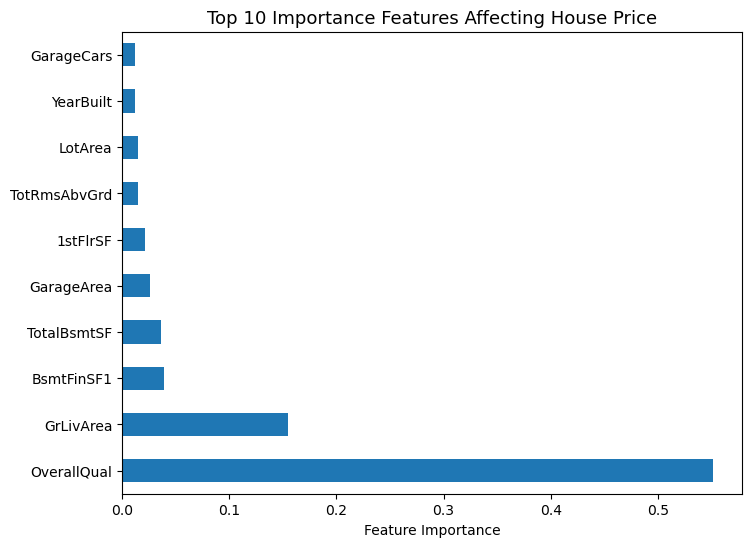

OverallQual    0.55
GrLivArea      0.15
BsmtFinSF1     0.04
TotalBsmtSF    0.04
GarageArea     0.03
1stFlrSF       0.02
TotRmsAbvGrd   0.02
LotArea        0.01
YearBuilt      0.01
GarageCars     0.01
GarageFinish   0.01
ExterQual      0.01
Neighborhood   0.01
GarageYrBlt    0.01
YearRemodAdd   0.00
dtype: float64

In [14]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include = ['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

x = df_encoded.drop(target, axis = 1)
y = df_encoded[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = RandomForestRegressor(random_state = 42)
model.fit(x_train, y_train)
importances = pd.Series(model.feature_importances_, index = x.columns).sort_values(ascending = False)

plt.figure(figsize = (8, 6))
importances.head(10).plot(kind = 'barh')
plt.title("Top 10 Importance Features Affecting House Price", fontsize = 13)
plt.xlabel("Feature Importance")
plt.show()
importances.head(15)

# Phase 4 Summary — Feature Analysis Insights

| Feature         | Type        | Relationship      | Impact on Price | Key Insight |
|-----------------|-------------|-------------------|------------------|--------------|
| OverallQual     | Numeric     | Strong positive   | ↑                | Quality homes have higher prices |
| GrLivArea       | Numeric     | Strong positive   | ↑                | Larger living area increases value |
| YearBuilt       | Numeric     | Moderate positive | ↑                | Newer homes tend to be more expensive |
| GarageCars      | Numeric     | Moderate positive | ↑                | More garage space adds value |
| Neighborhood    | Categorical | Mixed             | ↑/↓              | Premium neighborhoods cost more |
| LotArea         | Numeric     | Weak positive     | ↑                | Bigger land area slightly raises price |
| HouseStyle      | Categorical | Weak              | —                | Style alone doesn’t strongly impact price |

**Conclusion:**
The most influential factors in determining housing prices are *Overall Quality*, *Living Area Size*, and *Location (Neighborhood)*.  
These features will be prioritized in model training and visualization for Phase 5 (Predictive Modeling and Insights).


In [20]:
df_encoded.to_csv('processed_data.csv', index = False)
print("Processed datasets exported successfully!")

Processed datasets exported successfully!
